Naredimo histogram let za prenovo nepremičnin.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/kvadrati.csv')

In [2]:
def get_leto(s, keyword):
    if isinstance(s, str):
        start = s.find(keyword)
        if start == -1:
            return np.nan
        year = s[start + len(keyword): start + len(keyword) + 4]
        if year.isdigit():
            return float(year)

In [3]:
df['leto_gradnje'] = df['splosno'].apply(get_leto, keyword="Zgrajeno:=")
df['leto_adaptacije'] = df['splosno'].apply(get_leto, keyword="Adaptacija:=")

df['cas_obnove'] = df['leto_adaptacije'] - df['leto_gradnje']

df_obnova = df.dropna(subset=['cas_obnove'])

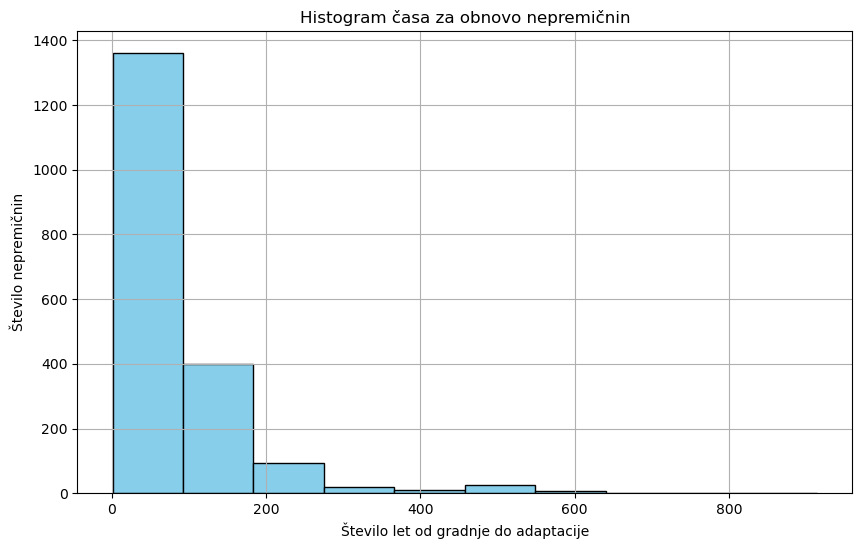

In [4]:
plt.figure(figsize=(10, 6))
plt.hist(df_obnova['cas_obnove'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram časa za obnovo nepremičnin')
plt.xlabel('Število let od gradnje do adaptacije')
plt.ylabel('Število nepremičnin')
plt.grid(True)
plt.show()